<a href="https://colab.research.google.com/github/eugeniapramesti/Fresh-Rotten-Vegetable-Prediction/blob/main/RM_ResNet50_Kelompok_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import os

# Libraries for TensorFlow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report


# Library for Transfer Learning
from tensorflow.keras.applications import resnet50

print("Importing libraries completed.")

Importing libraries completed.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# listing the folders containing images

# Main Dataset
main_folder="/content/drive/MyDrive/researchMethod"
class_names=os.listdir(main_folder)
print(class_names)

# # Validation Dataset
# validation_folder="../input/validationimage"
# val_class_names=os.listdir(validation_folder)
# print(val_class_names)

['stale_bitter_gourd', 'fresh_capsicum', 'stale_capsicum', 'fresh_bitter_gourd', 'fresh_tomato', 'stale_tomato']


In [4]:
# Preparing Training image data (image array and class name) for processing

# Declaring variables
x=[] # to store array value of the images
y=[] # to store the labels of the images

for folder in os.listdir(main_folder):
    image_list=os.listdir(main_folder+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(main_folder+"/"+folder+"/"+img_name,target_size=(100,100))

        # Converting to arrary
        img=image.img_to_array(img)

        # Transfer Learning: this is to apply preprocess of resnet to our images before passing it to resnet
        img=resnet50.preprocess_input(img) #  Optional step

        # Appending the arrarys
        x.append(img) # appending image array
        y.append(class_names.index(folder)) # appending class index to the array

print("Preparing Training Dataset Completed.")

Preparing Training Dataset Completed.


In [5]:
# # Preparing validation images data (image array and class name) for processing

# # Declaring variables
# val_images=[]
# val_image_label=[] # to store the labels of the images

# for folder in os.listdir(validation_folder):
#     image_list=os.listdir(validation_folder+"/"+folder)
#     for img_name in image_list:
#         # Loading images
#         img=image.load_img(validation_folder+"/"+folder+"/"+img_name,target_size=(100,100))

#         # Converting to arrarys
#         img=image.img_to_array(img)

#         # Transfer Learning: this is to apply preprocess of resnet to our images before passing it to resnet
#         img=resnet50.preprocess_input(img) #  Optional step

#         # Appending arrays
#         val_images.append(img) # appending image array
#         val_image_label.append(val_class_names.index(folder))

# print("Preparing Validation Dataset Completed.")

In [6]:
# Verifying the output

# Training Dataset
print("Training Dataset")

x=np.array(x) # Converting to np arrary to pass to the model
print(x.shape)

y=to_categorical(y) # onehot encoding of the labels
# print(y)
print(y.shape)


# # Validation Dataset
# print("Validation Dataset")

# val_images=np.array(val_images)
# print(val_images.shape)

# val_image_label=to_categorical(val_image_label) # onehot encoding of the labels)
# print(val_image_label.shape)

Training Dataset
(3237, 100, 100, 3)
(3237, 6)


In [7]:

# print("Summary of default ResNet50 model.\n")

# # we are using resnet50 for transfer learnin here. So we have imported it
# from tensorflow.keras.applications import resnet50
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense
# from sklearn.model_selection import train_test_split

# # initializing model with weights='imagenet'i.e. we are carring its original weights
# base_model = resnet50.ResNet50(weights='imagenet')

# input_layer = layers.Input(shape=(100, 100, 3))


# resnet_model=resnet50.ResNet50(weights='imagenet',input_tensor=input_layer,include_top=False)


# last_layer = resnet_model.output

# flatten = layers.Flatten()(last_layer)

# output_layer = layers.Dense(6, activation='softmax')(flatten)

# model = models.Model(inputs=input_layer, outputs=output_layer)

# # display the summary to see the properties of the model
# model.summary()

In [8]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50

input_layer = Input(shape=(100, 100, 3))

resnet_model = ResNet50(weights='imagenet', input_tensor=input_layer, include_top=False)

last_layer = resnet_model.output

flatten = Flatten()(last_layer)

output_layer = Dense(6, activation='softmax')(flatten)

model = Model(inputs=input_layer, outputs=output_layer)

# model.summary()

94765736/94765736 [==============================] - 0s 0us/step


In [9]:
# Train the Model

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=5)

In [10]:
# Compiling Model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])


In [11]:
# train Fit the Model
model.fit(xtrain,ytrain,epochs=6,batch_size=64,verbose=True,validation_data=(xtest,ytest))

model.save('resModel.h5')

print("Fitting the model completed.")

Epoch 1/6
36/36 [==============================] - 58s 283ms/step - loss: 1.4309 - accuracy: 0.8071 - val_loss: 9306956.0000 - val_accuracy: 0.1656
Epoch 2/6
36/36 [==============================] - 7s 182ms/step - loss: 0.1256 - accuracy: 0.9603 - val_loss: 361631.2500 - val_accuracy: 0.1656
Epoch 3/6
36/36 [==============================] - 7s 196ms/step - loss: 0.1473 - accuracy: 0.9598 - val_loss: 7594.9150 - val_accuracy: 0.3148
Epoch 4/6
36/36 [==============================] - 7s 183ms/step - loss: 0.3942 - accuracy: 0.9201 - val_loss: 376281.2500 - val_accuracy: 0.1677
Epoch 5/6
36/36 [==============================] - 7s 182ms/step - loss: 0.5788 - accuracy: 0.9497 - val_loss: 4512380.5000 - val_accuracy: 0.1656
Epoch 6/6
36/36 [==============================] - 7s 199ms/step - loss: 0.1459 - accuracy: 0.9625 - val_loss: 14710.9102 - val_accuracy: 0.2058


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Fitting the model completed.


In [12]:
from tensorflow.keras.models import load_model

# Load the saved model
resModel = load_model('resModel.h5')

In [13]:
# Generate predictions
y_pred = resModel.predict(xtest)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(ytest, axis=1)

# Generate classification report
report = classification_report(y_true_labels, y_pred_labels, target_names=class_names)
print(report)


31/31 [==============================] - 2s 25ms/step
                    precision    recall  f1-score   support

stale_bitter_gourd       0.12      0.88      0.22       106
    fresh_capsicum       0.00      0.00      0.00         5
    stale_capsicum       0.42      0.49      0.45       161
fresh_bitter_gourd       0.00      0.00      0.00        96
      fresh_tomato       0.00      0.00      0.00       292
      stale_tomato       0.97      0.09      0.16       312

          accuracy                           0.21       972
         macro avg       0.25      0.24      0.14       972
      weighted avg       0.39      0.21      0.15       972



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# This function helps to predict individual image supplied to it
def predict(img_name):
    img=image.load_img(img_name,target_size=(100,100))
    img=image.img_to_array(img)
    plt.imshow(img.astype('int32'))
    plt.show()
    img=resnet50.preprocess_input(img)
    prediction=model.predict(img.reshape(1,100,100,3))
    output=np.argmax(prediction)
    print(class_names[output])

# This function plots the image supplied in array
def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

#     plt.imshow(img) # showing b/w image
    plt.imshow(img.astype('int32'))

#     print(*predictions_array)
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

#     print(predicted_label)
#     print(true_label)

    if predicted_label == true_label: #setting up label color
        color='green' # correct then blue colour
    else:
        color='red' # wrong then red colour
    plt.xlabel("{} {:2.0f}% ({})".format(val_class_names[predicted_label], 100*np.max(predictions_array), val_class_names[true_label]), color=color)

# This function plots bar chart supplied in the array data
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)
#     print(predicted_label)
#     print(true_label)
    if predicted_label == 0:
        predicted_label=1
    if true_label == 0:
        true_label=1

    thisplot=plt.bar(range(6), predicted_label, color='seashell')
    plt.ylim([0,1])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

In [15]:
# # Preparing prediction arrary
# predictions=[]

# for img in val_images:
#     img=img.reshape(1,100,100,3)
#     predictions.append(model.predict(img))

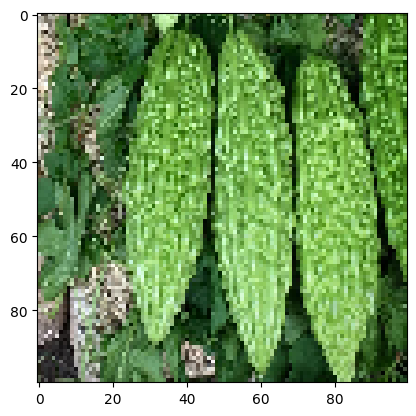

1/1 [==============================] - 0s 35ms/step
stale_capsicum


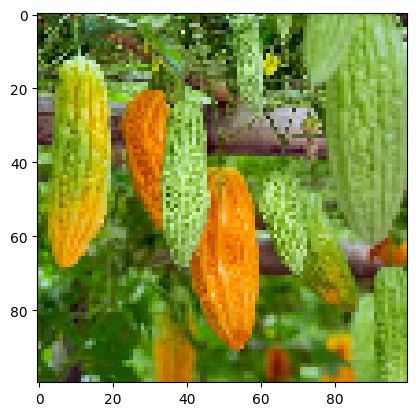

1/1 [==============================] - 0s 34ms/step
stale_capsicum


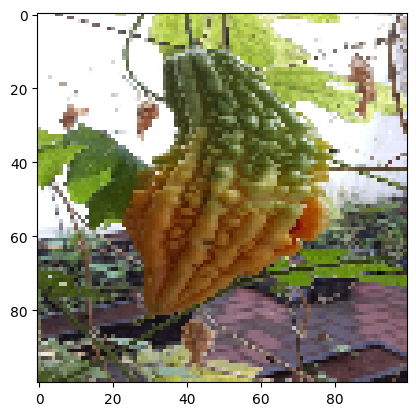

1/1 [==============================] - 0s 72ms/step
stale_capsicum


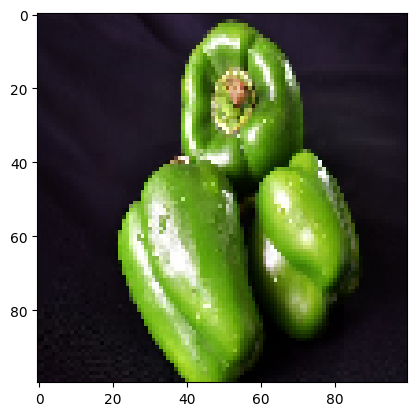

1/1 [==============================] - 0s 22ms/step
stale_bitter_gourd


In [19]:
!wget -q "https://asset.kompas.com/crops/MbfWKhcRP8gsZ5RydGKhvew1kHE=/1317x1566:3200x2822/750x500/data/photo/2021/08/02/610765f82d4a2.jpg"
predict('610765f82d4a2.jpg')

!wget -q "https://asset.kompas.com/crops/g71a14Iw22Q8dqRYa7nSWVF79FQ=/233x67:767x600/340x340/data/photo/2022/02/17/620de11bc7b47.jpg"
predict('620de11bc7b47.jpg')

!wget -q "https://nimadesriandani.files.wordpress.com/2016/01/20160113_062149.jpg"
predict('20160113_062149.jpg')

!wget -q "https://asset.kompas.com/crops/Jjb55AevfcK0gWCxDb3pTCFYH5U=/106x60:1280x843/750x500/data/photo/2021/10/09/616123b204b17.jpg"
predict('616123b204b17.jpg')


# # defining parameters to pass to function
# i=22 # image number 12. You may change value of i for play around
# plt.figure(figsize=(6,3))
# plt.subplot(1,2,1)

# plot_image(i,prediction, val_image_label, val_images)
# plt.subplot(1,2,2)
# plot_value_array(i, predictions, val_image_label)
# plt.show()


NameError: ignored

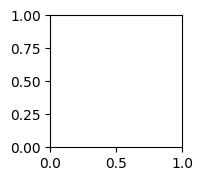

In [20]:
# Prediction on Validation images

# Declaring variables
num_rows=6
num_cols=4
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)

    plot_image(i,predictions, val_image_label, val_images)

    plt.subplot(num_rows, 2*num_cols, 2*i+2)

    plot_value_array(i, predictions, val_image_label)
plt.show()